## Collaborative Filtering

In [1]:
# import pandas
import pandas as pd
from sklearn.neighbors import NearestNeighbors

We will create an recommender engine based on Item Based Collaborative Filtering (IBCF) which searches for the most similar books based on the user ratings. We can download the data from [here](https://drive.google.com/file/d/1WvTmAfO09TCX7xp7uu06__ziic7JnrL5/view?usp=sharing).

In [31]:
book_ratings = pd.read_csv('data/BX-Book-Ratings.csv',sep=";", encoding="latin")
books = pd.read_csv('data/BX-Books.csv',sep=";", encoding="latin", error_bad_lines=False)

/home/kyle/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933:

* Explore both datasets

<AxesSubplot:>

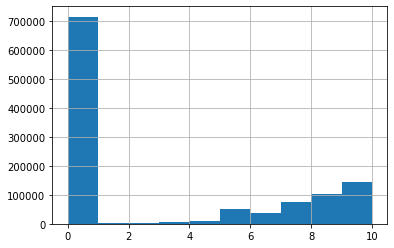

In [35]:
book_ratings['Book-Rating'].hist(bins=10)

In [4]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
book_ratings = pd.merge(book_ratings, books[['ISBN','Book-Title']], on='ISBN')

In [8]:
book_ratings_mean_count = pd.DataFrame(book_ratings.groupby('Book-Title')['Book-Rating'].mean())

In [9]:
book_ratings_mean_count['count'] = pd.DataFrame(book_ratings.groupby('Book-Title')['Book-Rating'].count())

In [21]:
book_ratings_mean_count = book_ratings_mean_count[book_ratings_mean_count['count'] > 100]

In [22]:
book_ratings_mean_count.shape

(904, 2)

In [23]:
book_ratings_sample = book_ratings[book_ratings['Book-Title'].isin(book_ratings_mean_count.index)]

array([[<AxesSubplot:title={'center':'User-ID'}>,
        <AxesSubplot:title={'center':'Book-Rating'}>]], dtype=object)

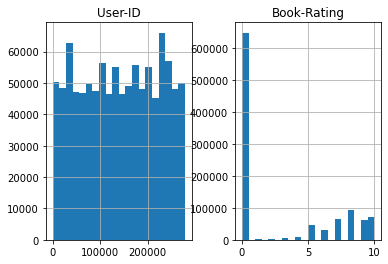

In [30]:
book_ratings.hist(bins=20)

* create dataframe with name 'df_book_features' from book_ratings that have `ISBN` as index, `User-ID` as columns and values are `Book-Rating`.
    - The data are quite big so it's OK to use a sample only in case your PC has limited RAM.


In [10]:
# book_ratings_sample = book_ratings.sample(int(len(book_ratings) * .1), axis=0)

In [26]:
df_book_features = book_ratings_sample.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating')

In [27]:
df_book_features

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001382608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002261529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0002558122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0006177379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0000VZEH8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0001FZGBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B0001FZGPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* create the instance of the NearestNeighbors class

* fit the NearestNeighbors using'df_book_features'

* create function that returns top 5 most similar movies (according to KNN model) for selected ISBN
    * the input will be Book-Title from the DataFrame books 
    * the output will be the Book-Titles of the top 5 most similar books.
    * for every book in the top 5 most similar books, print also the distance from the selected book (ISBN we chose as input to the function)

* Apply the function to book of your choice